In [1]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt
import os
import logging

### Full code

In [2]:
## Setup chrome options
chrome_options = Options()
chrome_options.add_argument("--headless") # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")

# Silent download of drivers
logging.getLogger('WDM').setLevel(logging.NOTSET)
os.environ['WDM_LOG'] = 'False'

# Create service
webdriver_service = Service(ChromeDriverManager().install())

# Create driver
driver = webdriver.Chrome(service = webdriver_service, options = chrome_options)

# Go to the characters in books page
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

# # Click on Accept cookies
# time.sleep(3)
# driver.find_element(By.XPATH, '//div[text()="ACCEPT"]').click()

# Find books
book_categories = driver.find_elements(by=By.CLASS_NAME, value='category-page__member-link')

books = []
for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name': book_name, "url": book_url})

[WDM] - Downloading: 100%|█████████████████████████████████████████████████████████| 6.46M/6.46M [00:16<00:00, 418kB/s]


In [3]:
books

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [4]:
character_list = []

for book in books:
    # go to book page
    driver.get(book['url'])
    
    character_elems = driver.find_elements(by=By.CLASS_NAME, value = 'category-page__member-link')
    
    for elem in character_elems:
        character_list.append({'book': book['book_name'],'character': elem.text})

In [5]:
pd.DataFrame(character_list)

,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs
...,...,...
1270,Category:Time of Contempt characters,Yanna of Murivel
1271,Category:Time of Contempt characters,Yarpen Zigrin
1272,Category:Time of Contempt characters,Yennefer of Vengerberg
1273,Category:Time of Contempt characters,Yiolenta Suarez


### Number of characters per book

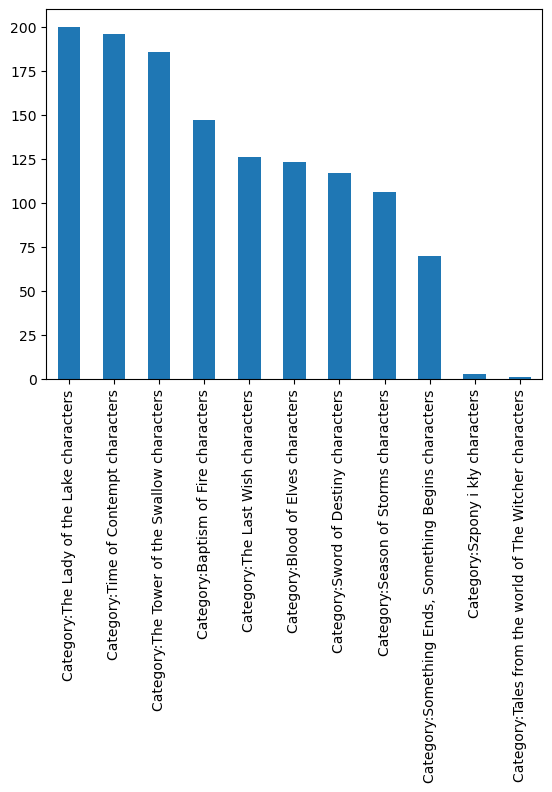

In [6]:
character_df = pd.DataFrame(character_list)

character_df['book'].value_counts().plot(kind="bar")
plt.show()

In [13]:
df = pd.DataFrame(books)

In [14]:
df.to_csv()

',book_name,url\r\n0,Category:Baptism of Fire characters,https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters\r\n1,Category:Blood of Elves characters,https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters\r\n2,Godamba Thaess\'en,https://witcher.fandom.com/wiki/Godamba_Thaess%27en\r\n3,Category:Season of Storms characters,https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters\r\n4,"Category:Something Ends, Something Begins characters","https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters"\r\n5,Category:Sword of Destiny characters,https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters\r\n6,Category:Szpony i kły characters,https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters\r\n7,Category:Tales from the world of The Witcher characters,https://witcher.fandom.com/wiki/Category:Tales_from_the_world_of_The_Witcher_characters\r\n8,Category:The Lady of the Lake characters,https://witcher.fand

In [16]:
df.to_csv('load1.csv')